# Correct a power spectrum by the instrument beam with healpy
- categories: [healpy,cmb,cosmology]                                                                                                

If you are analyzing a map from an instrument with a specific beam width, you can correct the power spectrum by the smoothing factor caused by that beam and obtain a better approximation of the power spectrum of the orignal sky.

In [1]:
import healpy as hp
import numpy as np
import astropy.units as u
hp.disable_warnings()

In [2]:
m, h = hp.read_map(
    "https://portal.nersc.gov/project/cmb/so_pysm_models_data/equatorial/dust_T_ns512.fits", h=True
)

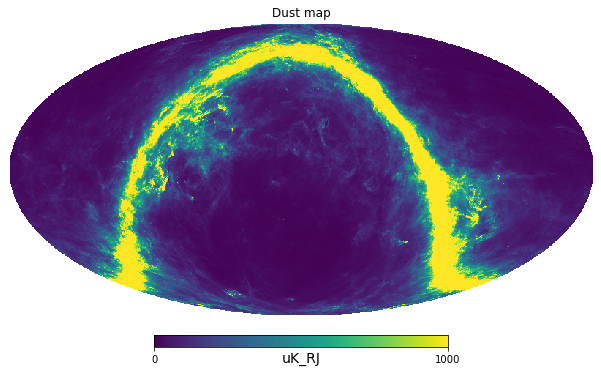

In [3]:
hp.mollview(m, min=0, max=1000, title="Dust map", unit="uK_RJ")

In [4]:
cl = hp.anafast(m)

In this case we assume that the dust map from PySM is the true sky, then we apply a smoothing caused by the beam

In [5]:
beam = 30 * u.arcmin

In [6]:
m_smoothed = hp.smoothing(m, fwhm=beam.to_value(u.radian))

In [7]:
cl_smoothed = hp.anafast(m_smoothed)

We can get the transfer function of the beam, generally referred as $B_\ell$:

In [8]:
bl = hp.gauss_beam(fwhm=beam.to_value(u.radian), lmax=len(cl)-1)

In [9]:
import matplotlib.pyplot as plt

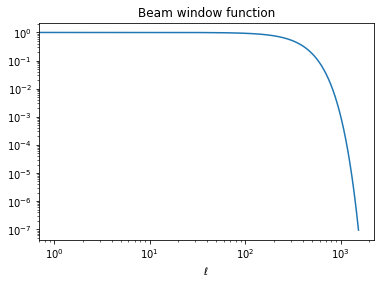

In [10]:
plt.loglog(bl)
plt.title("Beam window function")
plt.xlabel("$\ell$");

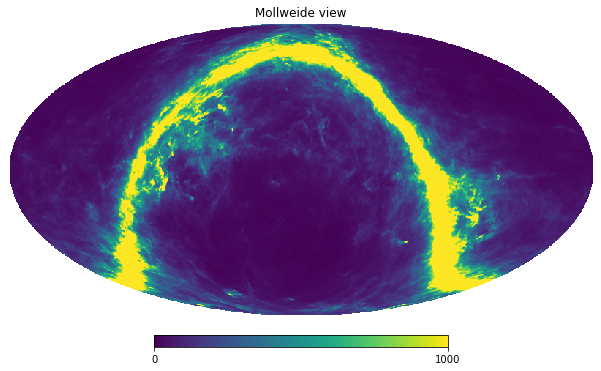

In [11]:
hp.mollview(m_smoothed, min=0, max=1000)

We can recover the input $C_\ell$ as $C_\ell^{input} = \dfrac{C_\ell^{smoothed}}{B_\ell^2} $:

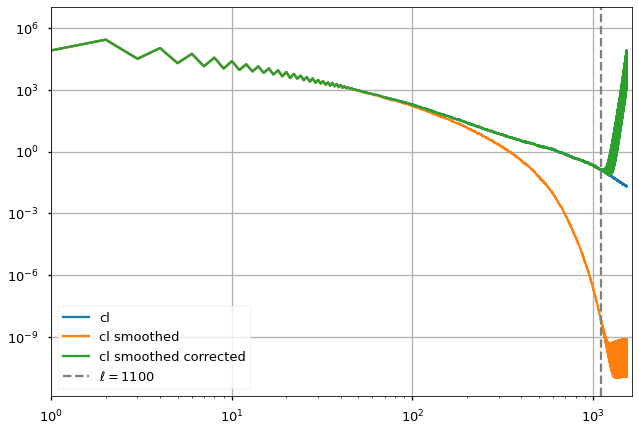

In [29]:
plt.style.use("seaborn-talk")
plt.loglog(cl, label="cl")
plt.plot(cl_smoothed, label="cl smoothed")
plt.plot(cl_smoothed/bl**2, label="cl smoothed corrected")
plt.xlim(1, len(cl)+100)
plt.axvline(1100, color="gray", ls="--", label="$\ell=1100$");
plt.legend()
plt.grid();


However, once the smoothed $C_\ell$ reach machine precision, there is no more signal left, the beam deconvolution then causes extra noise. We need to limit our analysis to a range of $\ell$ before the numerical error dominates, in this case for example, $\ell=1100$.